## Exercise 3-1: Probability Theory
***
An astronomer has developed a machine learning code that classifies galaxies into three categories: spiral, elliptical, and irregular. This algorithm has a 95 per cent accuracy for spirals, 90 per
cent accuracy for ellipticals, and 80 per cent accuracy for irregulars. If a galaxy gets misclassified,
the probability for either of the two other classes is equal.
The astronomer uses this code to classify galaxies in a sample that consists of 70 per cent spirals,
28 per cent ellipticals and 2 per cent irregulars.
1. What is the probability that a randomly selected galaxy classified as irregular is actually an
irregular?
2. What is the probability that a randomly selected galaxy classified as an elliptical is actually
a spiral?

## Exercise 3-2 Gradient descent
***
Here, we want to test how well gradient descent does for several test problems. For this, use three
different functions, both in 2 and 30 dimensions:
-  Sphere function
-  Rosenbrock function
-  Rastrigin function

You can find the analytic descriptions here:
https://en.wikipedia.org/wiki/Test_functions_for_optimization
1. Implement a gradient optimizer
To test your algorithm with each function, you will need to calculate the gradient for each of the
above functions. Use a default learning rate of η = 0.1.
2. Test your gradient optimizer on all three functions for 2 dimensions
How many iterations do you need to achieve an accuracy of 1.e-5? How do you have to adjust
your learning rate for each test function? Why?
3. Plot the function value vs the number of iterations
4. Test your gradient optimizer on all three functions for 30 dimensions
Here, we want to test how well gradient descent does for several test problems. For this, use three
different functions, both in 2 and 30 dimensions.

## Exercise 3-3 Monte Carlo optimizers
***
Here, we want to test how well Monte Carlo methods do for several test problems. Use the same
test functions as in 3-2.
1.  Implement a Metropolis Hastings MCMC algorithm
2.  Test your MCMC on all three functions for 2 dimensions
How many iterations do you need to achieve an accuracy of 1.e-5? How do you have to adjust
your learning rate for each test function? Why? How about 30 dimensions?
3.  Plot the function value vs the number of iterations and the 1st vs 2nd dimension for each
step
4.  Bonus questions: Try other stochastic methods, e.g.
-   Affine invariant ensemble sampler http://dfm.io/emcee
-   Parallel tempering http://dfm.io/emcee
-   Genetic algorithms https://github.com/deap/deap
***


# Test function
1. Shperical Function. 

The function is given by $f(x)= \sum_i x_i^2$ and the Gradient is given by $ f^{(i)}(x)=2x_j$
2. Rosenbrock Function. According to [Wikipedia](https://en.wikipedia.org/wiki/Test_functions_for_optimization), The Rosenbrock function in $N$-dimension is given by
$$f(x) = \sum_{i=1}^{N-1} \left[100 (x_{i+1}-x_i^2)^2+(1-x_i)^2\right]$$
The derivative is then given by 
$$\frac{\partial f}{\partial x_j} = \sum_{i=1}^{N-1} \left[ 2(x_{i+1}-x_{i}^2) \delta_{j(i+1)}-2\left[2x_{i+1} x_{i} -2x_{i}^3-x_{i}+1\right]\delta_{ji}\right]\\
= 4x_j^3-4x_j x_{j+1}-2x_{j-1}^2+4x_j-2$$

3. Rastrigin Function. The function is given by 
$$ f(x) = 10 N \sum_i^N \left[ x_i^2- 10\cos (2\pi x_i)\right]$$

and the derivativ is given by
$$\frac{\partial f}{\partial x_j} = 20N\left(x_j+10\pi\sin(2\pi x_j)\right)$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sc
from scipy import spatial


## 3.2 Gradient Descent
***
### Spherical Function

In [2]:
########## 2 DImensions ##############

#Pick initial Vector 
x=np.array([1,1])

#Learning rate
a=0.1

#initial updated value
x_up =x

#update and looping
it  = 0
while True:
    try :
        it = it+1
        x =x_up
        x_up = 0.8*x
        if spatial.distance.euclidean(x,x_up) < 0.0000000000000001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break

number of iteration : 161
Minimum value: [2.49739884e-16 2.49739884e-16]


In [3]:
#Pick initial Vector 
x=np.ones((30,))

#Learning rate
a=0.000000001

#initial updated value
x_up =x

#update and looping
it  = 0

while True:
    try : 
        it = it+1
        x =x_up
        x_up = 0.8*x
        if spatial.distance.euclidean(x,x_up) < 0.0001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break

number of iteration : 43
Minimum value: [6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05 6.80564734e-05 6.80564734e-05
 6.80564734e-05 6.80564734e-05]


## Rosenbrock Function

In [4]:
def kronecker(i,j):
    if i==j:
        return 1
    else :
        return 0

def der_f (x,j,N) :
    """Derivative of Rosenbrock function with repect to x_j, with j=1,2,..., N """
    if j==N :
        return 4*x[N-1]**3-2*x[N-2]**2+4*x[N-1]-2
    elif j==1 :
        return 4*x[0]**3-4*x[0]*x[1]+4*x[0]-2
    else :
        return 4*x[j-1]**3-4*x[j-1]*x[j]-2*x[j-2]**2+4*x[j-1]-2

In [5]:
###################### 2 Dimensions#######################
#Pick initial Vector 
x=np.array([3,5])

#Learning rate
a=0.000000001  #

#initial updated value
x_up =x

#update and looping
it  = 0

while True:
    try :
        it = it+1
        x =x_up
        x_up = x - a*np.array([der_f(x, j, 2) for j in range(1,3)])   
        if spatial.distance.euclidean(x,x_up) < 0.0001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break
        

number of iteration : 1
Minimum value: [2.99999994 4.9999995 ]


In [6]:
############ B.2 30 Dimension #################

#Pick initial Vector 
x=np.array([i for i in range(1,31)])

#Learning rate
a=0.0000001  #

#initial updated value
x_up =x

#update and looping
it  = 0

while True:
    try :
        it = it+1
        x =x_up
        x_up = x - a*np.array([der_f(x, j, 30) for j in range(1,31)]) 
        if spatial.distance.euclidean(x,x_up) < 0.00001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break
        

number of iteration : 430016
Minimum value: [1.03712334 1.59593214 1.86742512 1.99892244 2.06662354 2.10431282
 2.12692448 2.14139094 2.15114967 2.15802319 2.16303875 2.16680714
 2.16970861 2.17198936 2.17381425 2.17529696 2.17651789 2.17753518
 2.17839168 2.17911955 2.17974332 2.18028191 2.18075014 2.1811595
 2.18151593 2.18178471 2.18151178 2.17635525 2.13137912 1.81342158]


## Rastrigin Function

In [7]:
#Gradient Vector :
def grad_f(x, N) :
    return np.array([20*N*(x[j-1]+10*np.pi* np.sin(2*np.pi*x[j-1])) for j in range(1, N+1)])

#################### 2 Dimensions #################

#Pick initial Vector 
x=np.array([1,6])

#Learning rate
a=0.000000001

#initial updated value
x_up =x

#update and looping
it  = 0
while True:
    try :
        it = it+1
        x =x_up
        x_up = x-a*grad_f(x, 2)
        if spatial.distance.euclidean(x,x_up) < 0.0001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break

number of iteration : 1
Minimum value: [0.99999996 5.99999976]


In [8]:
################### 30 Dimensions ####################

#Gradient Vector :
def grad_f(x, N) :
    return np.array([20*N*(x[j-1]+10*np.pi* np.sin(2*np.pi*x[j-1])) for j in range(1, N+1)])

#Pick initial Vector 
x=np.array([i for i in range(1,31)])

#Learning rate
a=0.000000000000001

#initial updated value
x_up =x

#update and looping
it  = 0
while True:
    try :
        it = it+1
        x =x_up
        x_up = x-a*grad_f(x, 30)
        if spatial.distance.euclidean(x,x_up) < 0.0001:
            print ("number of iteration : {}".format(it))
            print ("Minimum value: {}".format(x_up))
            break
    except ValueError:
        print("overflow happens at {} iteration".format(it))
        break
    except KeyboardInterrupt :
        print ("number of iteration so far: {}".format(it))
        print ("Minimum value so far: {}".format(x_up))
        break

number of iteration : 1
Minimum value: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


***
## 3.3 Montecarlo Optimizer
***
### Sphericle Functions

In [9]:
def prob(x, N) :
    return np.exp(-sum([x[i-1]**2 for i in range(1, N+1)]))
prob(np.array([0]),1)

################### 2 Dimensions#############
#choose initial value of x
x=np.array([1])
x_up = x
it = 0
axis_x = []
#axis_y =[]

#choose Gaussian as proposal distribution
#choose initial value of x
x=np.array([1,1])
x_up = x
it = 0
axis_x = []
axis_y =[]

#choose Gaussian as proposal distribution
try :
    for it in range(0, 300000) :
        it = it+1
        x = x_up
        x_up = np.random.multivariate_normal(x, np.identity(2))
        u = np.random.uniform(0.0, 1.0 , 1)
        if float(u) < prob(x_up, 2)/ prob(x, 2):
            pass
        else :
            x_up = x
            

        if it > 100000 :
            axis_x.append(x_up[0])
            axis_y.append(x_up[1])
            
except KeyboardInterrupt :
    print(it)


<function matplotlib.pyplot.show(*args, **kw)>

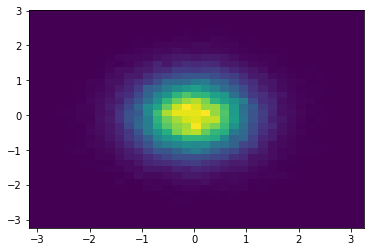

In [10]:
plt.hist2d(axis_x, axis_y, 35)
plt.show

### Rosenbrock Function

In [11]:
def ros(x, N) :
    return sum([100*(x[i]-x[i-1]**2)**2+(1-x[i-1])**2   for i in range(1, N)])
def prob_ros(x, N) :
    return np.exp(-ros(x, N))

In [ ]:
#choose initial value of x
x=np.array([1,1])
x_up = x
it = 0
axis_x = []
axis_y =[]

#choose Gaussian as proposal distribution
try :
    for it in range(0, 3000000) :
        it = it+1
        x = x_up
        x_up = np.random.multivariate_normal(x, np.identity(2))
        u = np.random.uniform(0.0, 1.0 , 1)
        if float(u) < prob_ros(x_up, 2)/ prob_ros(x, 2):
            pass
        else :
            x_up = x
            

        if it > 2500000 :
            axis_x.append(x_up[0])
            axis_y.append(x_up[1])
            
except KeyboardInterrupt :
    print(it)


In [ ]:
plt.hist2d(axis_x, axis_y, 35)
plt.show

### Rastrigin Function

In [ ]:
def rast(x, N) :
    return 10*N*sum([x[i-1]**2-10*np.cos(2*np.pi*x[i-1])  for i in range(1, N+1)])
def prob_rast(x, N) :
    return np.exp(-rast(x, N))

In [ ]:
#choose initial value of x
x=np.array([1,1])
x_up = x
it = 0
axis_x = []
axis_y =[]

#choose Gaussian as proposal distribution
try :
    for it in range(0, 3000000) :
        it = it+1
        x = x_up
        x_up = np.random.multivariate_normal(x, np.identity(2))
        u = np.random.uniform(0.0, 1.0 , 1)
        if float(u) < prob_rast(x_up, 2)/ prob_rast(x, 2):
            pass
        else :
            x_up = x
            

        if it > 2500000 :
            axis_x.append(x_up[0])
            axis_y.append(x_up[1])
            
except KeyboardInterrupt :
    print(it)


In [ ]:
plt.hist2d(axis_x, axis_y, 35)
plt.show